In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first

After importing all the necessary background code, I'll examine whether the weight of first births differs from the weight of sequencial births

In [2]:
import thinkstats2

In [3]:
import thinkplot

In [4]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

In [5]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

In [6]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [7]:
firsts.totalwgt_lb.mean() < others.totalwgt_lb.mean() 
''' we see that, on average, first births are lighter than following births '''

True

Next, I make a histogram to compare the counts of birth sizes between first births and all others. 
I use the totalwgt_lb variable, but as the data has too much variance and looks unclear, I multiply each figure by two and use the np.floor function to group babies within half a pound (thus doubling the number of bars from using brtwgt_lb)

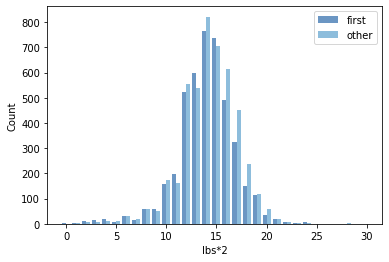

In [8]:
first_hist = thinkstats2.Hist(np.floor(firsts.totalwgt_lb*2), label='first')
other_hist = thinkstats2.Hist(np.floor(others.totalwgt_lb*2), label='other')
width = 0.4
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='lbs*2', ylabel='Count')

It does appear that, on average, first births are smaller than others as the distribution leans a bit left.

In [9]:
CohenEffectSize(others.totalwgt_lb, firsts.totalwgt_lb)

0.08867292707260174

Cohen's difference in means comes out to 0.0887 which, demonstrates that, while there is an average difference (nearly four times greater than the difference in means of pregnancy length, 0.0289), the difference is very slight and a lot of layover between the two can be expected. 